<a href="https://colab.research.google.com/github/aysesilainci/django-to-do-app/blob/main/Chiller_energy_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
chillerenergy_chiller_energy_data_path = kagglehub.dataset_download('chillerenergy/chiller-energy-data')

print('Data source import complete.')


100%|██████████| 173k/173k [00:00<00:00, 44.0MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
chillerdata = pd.read_csv('/content/HVAC Energy Data.csv', index_col="Local Time (Timezone : GMT+8h)",parse_dates=True,)
chillerdata.sort_index(inplace=True)

In [4]:
chillerdata

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
Local Time (Timezone : GMT+8h),,,,,,,,,
2019-08-18 00:00:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
2019-08-18 00:30:00,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2019-08-18 01:00:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
2019-08-18 01:30:00,84.8,31.4,458.5,117.0,82,75,79,12,29.83
2019-08-18 02:00:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83
...,...,...,...,...,...,...,...,...,...
2020-06-01 11:00:00,108.6,33.4,579.9,132.8,84,75,74,5,29.89
2020-06-01 11:30:00,108.9,33.2,567.3,128.6,84,75,74,6,29.89
2020-06-01 12:00:00,108.7,33.0,561.7,125.7,82,75,79,6,29.89


In [5]:
#Check if missing data
chillerdata.isna().sum()
#There is none

,0
Chilled Water Rate (L/sec),0
Cooling Water Temperature (C),0
Building Load (RT),0
Chiller Energy Consumption (kWh),0
Outside Temperature (F),0
Dew Point (F),0
Humidity (%),0
Wind Speed (mph),0
Pressure (in),0


In [6]:
chillerdata = chillerdata.resample('H').sum()

<ipython-input-6-19b51e644358>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  chillerdata = chillerdata.resample('H').sum()


In [7]:
chillerdata['Month'] = chillerdata.index.month
chillerdata['Day'] = chillerdata.index.day
chillerdata['Hour'] = chillerdata.index.hour

In [8]:
chillerdata.drop(columns=["Chiller Energy Consumption (kWh)","Cooling Water Temperature (C)", "Building Load (RT)"],inplace=True)
chillerdata

,Chilled Water Rate (L/sec),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in),Month,Day,Hour
Local Time (Timezone : GMT+8h),,,,,,,,,
2019-08-18 00:00:00,169.9,164,150,158,25,59.66,8,18,0
2019-08-18 01:00:00,169.4,164,150,158,24,59.66,8,18,1
2019-08-18 02:00:00,169.1,164,152,163,24,59.66,8,18,2
2019-08-18 03:00:00,175.5,164,152,163,21,59.66,8,18,3
2019-08-18 04:00:00,178.4,164,154,168,22,59.60,8,18,4
...,...,...,...,...,...,...,...,...,...
2020-06-01 09:00:00,220.9,168,152,153,11,59.78,6,1,9
2020-06-01 10:00:00,222.1,168,150,148,13,59.78,6,1,10
2020-06-01 11:00:00,217.5,168,150,148,11,59.78,6,1,11


<Axes: >

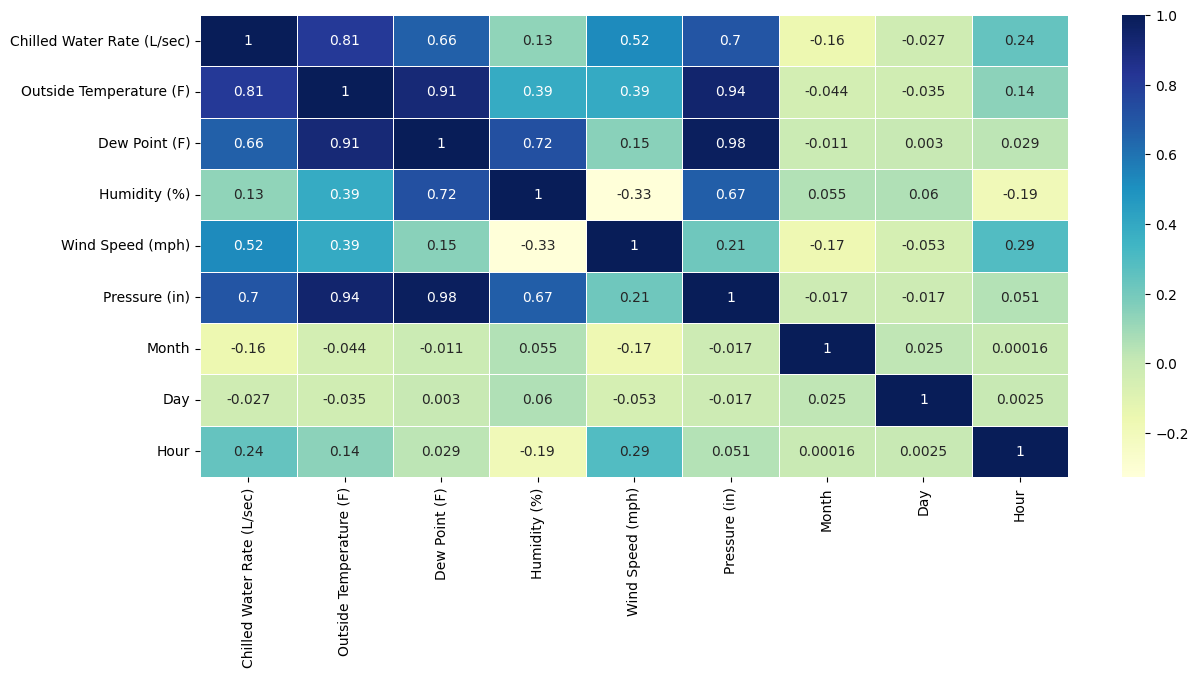

In [9]:
plt.figure(figsize=(14,6))

sns.heatmap(chillerdata.corr(), linewidth = 0.6, cmap="YlGnBu", annot=True)


In [10]:
X = chillerdata.drop(["Chilled Water Rate (L/sec)"],axis=1)
y = chillerdata["Chilled Water Rate (L/sec)"]
y.head()


,Chilled Water Rate (L/sec)
Local Time (Timezone : GMT+8h),
2019-08-18 00:00:00,169.9
2019-08-18 01:00:00,169.4
2019-08-18 02:00:00,169.1
2019-08-18 03:00:00,175.5
2019-08-18 04:00:00,178.4


📊 Random Forest Regresyon Sonuçları:
RMSE: 10.259
MAE: 7.101


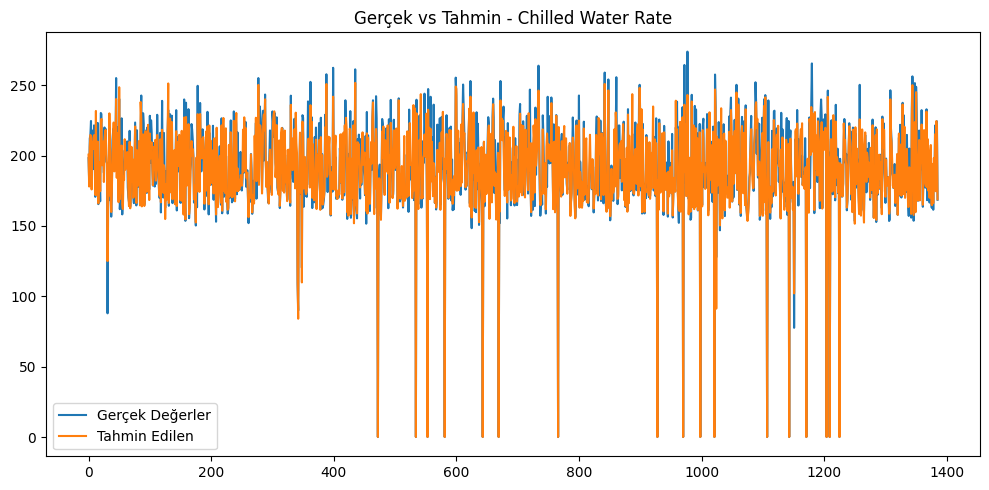

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Model tanımı ve eğitimi
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

# Tahmin yap
y_preds = rfr.predict(X_test)

# Başarı metrikleri
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_preds)

print("📊 Random Forest Regresyon Sonuçları:")
print("RMSE:", round(rmse, 3))
print("MAE:", round(mae, 3))

# Tahmin vs Gerçek grafik
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Gerçek Değerler')
plt.plot(y_preds, label='Tahmin Edilen')
plt.title("Gerçek vs Tahmin - Chilled Water Rate")
plt.legend()
plt.tight_layout()
plt.show()

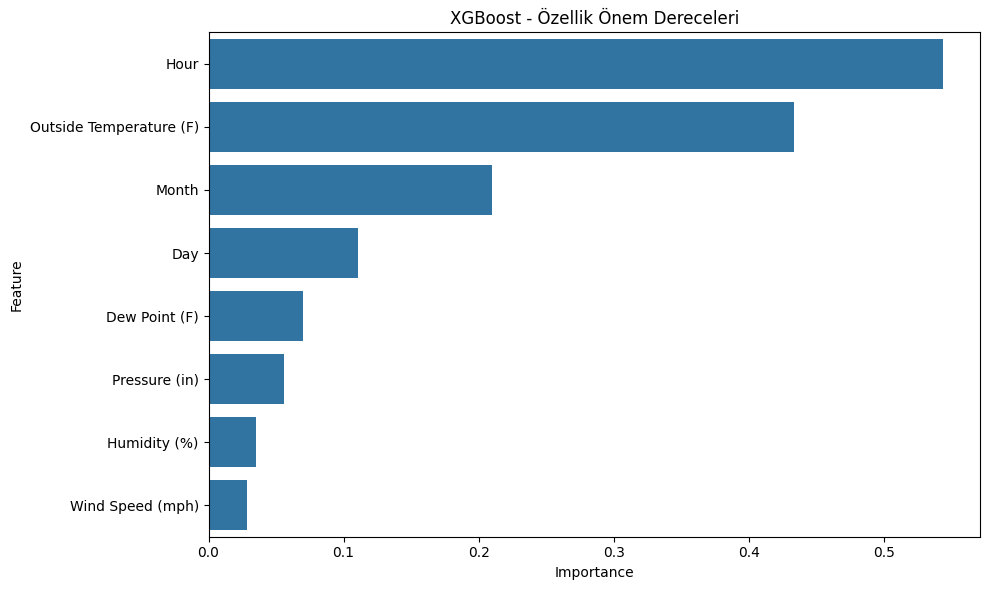

(np.float64(9.85346857885137), 6.838458581753667)

In [31]:
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 6. XGBoost modeli
xgb_model = XGBRegressor(n_estimators=500, random_state=1)
xgb_model.fit(X_train, y_train)

# 7. Tahmin ve hata
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)

# 8. Özellik önem dereceleri (permutation importance)
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importances.sort_values(by='Importance', ascending=False, inplace=True)

# 9. Görselleştir
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title("XGBoost - Özellik Önem Dereceleri")
plt.tight_layout()
plt.show()

xgb_rmse, xgb_mae


Train RMSE 10.258644240104132
Train MAE 7.100529581529581

In [ ]:
y_preds = xgb.predict(X_test)
error_metrics(y_test, y_preds)

In [20]:
# Chilled Water Rate sürekli bir değişken, bunu sınıfa çeviriyoruz
threshold = y.mean()
y_class = y.apply(lambda x: 1 if x > threshold else 0)


In [21]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=2)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

clf = RandomForestClassifier(random_state=1)
clf.fit(X_train, y_train_class)

y_preds_class = clf.predict(X_test)
f1 = f1_score(y_test_class, y_preds_class)

print("Random Forest F1 Skoru:", f1)


Random Forest F1 Skoru: 0.8869047619047619


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=1, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train_class)

y_preds_xgb = xgb_clf.predict(X_test)
f1_xgb = f1_score(y_test_class, y_preds_xgb)

print("XGBoost F1 Skoru:", f1_xgb)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:12:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost F1 Skoru: 0.9116555308092057


Anomali Sayısı: 84
Örnek Anomaliler:
                                Outside Temperature (F)  Dew Point (F)  \
Local Time (Timezone : GMT+8h)                                           
2019-09-08 17:00:00                                 176            148   
2020-02-07 23:00:00                                  75             73   
2020-03-05 12:00:00                                 176            144   
2020-03-15 07:00:00                                 163            154   
2019-11-22 09:00:00                                 164            152   

                                Humidity (%)  Wind Speed (mph)  Pressure (in)  \
Local Time (Timezone : GMT+8h)                                                  
2019-09-08 17:00:00                      128                15          59.48   
2020-02-07 23:00:00                       94                 7          29.89   
2020-03-05 12:00:00                      116                26          59.66   
2020-03-15 07:00:00                    

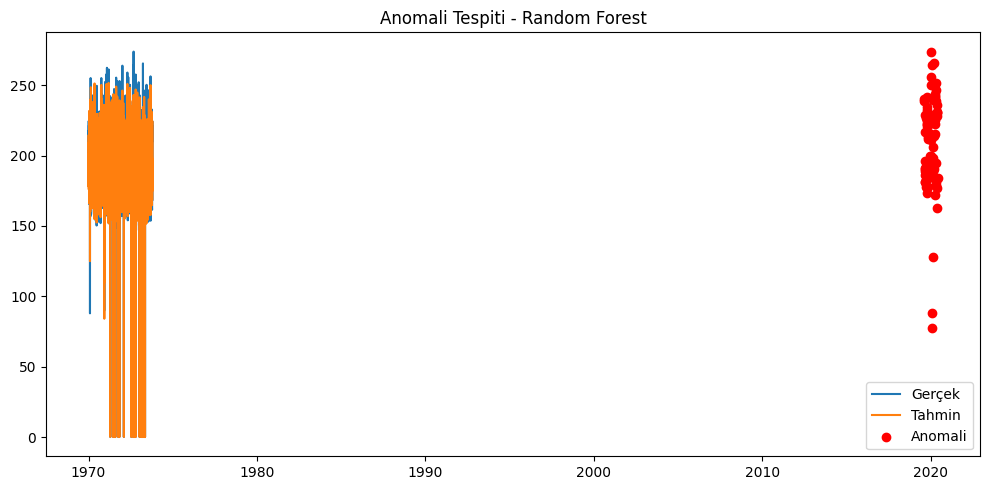

In [28]:
# 1. Tahmin hatalarının mutlak değerini al (residuals)
residuals = np.abs(y_test - y_preds)

# 2. Anomali eşiği: ortalama + 2 * standart sapma
threshold = residuals.mean() + 2 * residuals.std()

# 3. Anomalileri tespit et
anomalies = residuals > threshold

# 4. Kaç tane anomali var?
print("Anomali Sayısı:", anomalies.sum())

# 5. Anomali içeren örnekler (giriş verileri)
anomaly_samples = X_test[anomalies]
print("Örnek Anomaliler:")
print(anomaly_samples.head())

# 6. Grafikle görselleştir (isteğe bağlı)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Gerçek')
plt.plot(y_preds, label='Tahmin')
plt.scatter(anomalies[anomalies].index, y_test[anomalies], color='red', label='Anomali', zorder=5)
plt.title("Anomali Tespiti - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
from datetime import datetime

# 1. Uyarı mesajlarını oluştur
anomaly_log = []

for i in anomalies[anomalies].index:
    current_data = X_test.loc[i]
    actual = y_test.loc[i]
    predicted = xgb_preds[X_test.index.get_loc(i)]
    msg = f"[{i}] ⚠️ Aşırı tüketim tespit edildi! Gerçek: {actual:.2f}, Tahmin: {predicted:.2f} ➤ Soğutmayı artır!"
    anomaly_log.append(msg)
    print(msg)

# 2. Log dosyasına yaz (isteğe bağlı)
with open("anomaly_log.txt", "w", encoding="utf-8") as file:
    for entry in anomaly_log:
        file.write(entry + "\n")


[2019-09-08 17:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 190.40, Tahmin: 202.42 ➤ Soğutmayı artır!
[2020-02-07 23:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 87.90, Tahmin: 55.01 ➤ Soğutmayı artır!
[2020-03-05 12:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 214.10, Tahmin: 229.88 ➤ Soğutmayı artır!
[2020-03-15 07:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 194.90, Tahmin: 218.70 ➤ Soğutmayı artır!
[2019-11-22 09:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 216.10, Tahmin: 194.55 ➤ Soğutmayı artır!
[2019-11-11 18:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 225.30, Tahmin: 192.20 ➤ Soğutmayı artır!
[2019-08-25 18:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 181.20, Tahmin: 202.32 ➤ Soğutmayı artır!
[2019-09-07 09:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 188.80, Tahmin: 207.90 ➤ Soğutmayı artır!
[2019-09-15 08:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 177.90, Tahmin: 210.94 ➤ Soğutmayı artır!
[2019-09-02 07:00:00] ⚠️ Aşırı tüketim tespit edildi! Gerçek: 216.

Train RMSE 9.772749485719226
Train MAE 6.962590576719068